# Demonstration of object relation outputs

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from objectmapping import ObjectMapping
from mrcnn_classes import class_names

Using TensorFlow backend.


In [2]:
# testing
from PIL import Image

In [ ]:
%%time
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True)

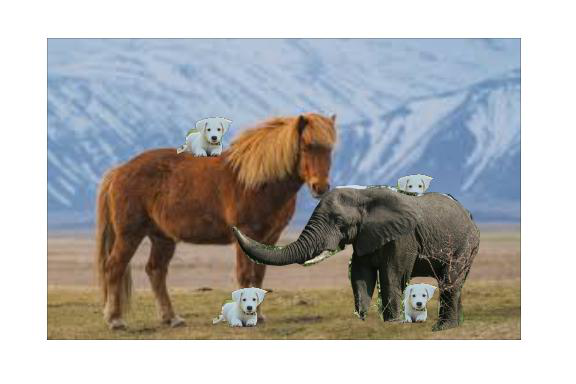

In [4]:
#load image
imagefile = '../images/animals_test_mixed_hidden-5.jpg'
img = load_img(imagefile)
img

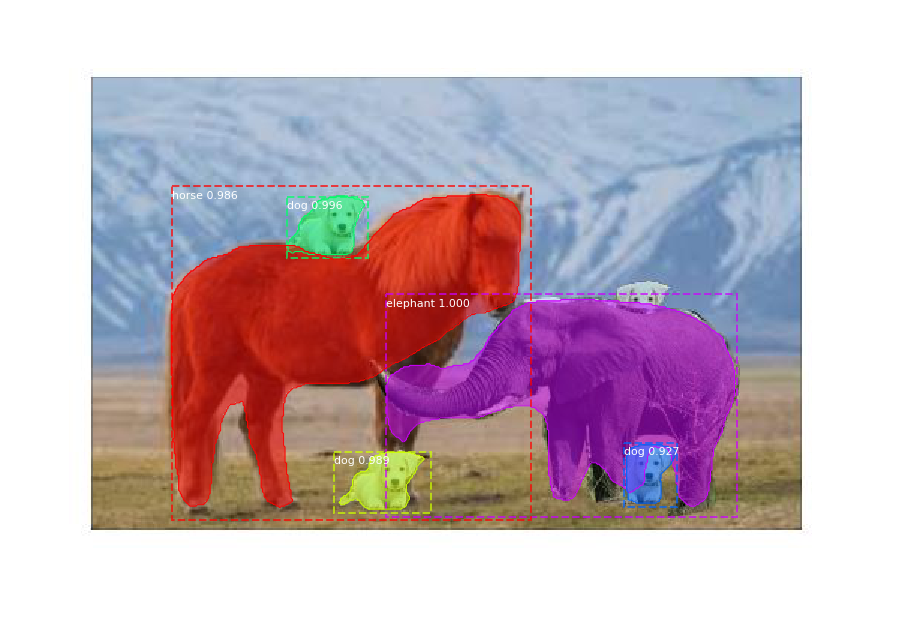

CPU times: user 7.27 s, sys: 903 ms, total: 8.17 s
Wall time: 6.52 s


In [5]:
%%time
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# Start Testing

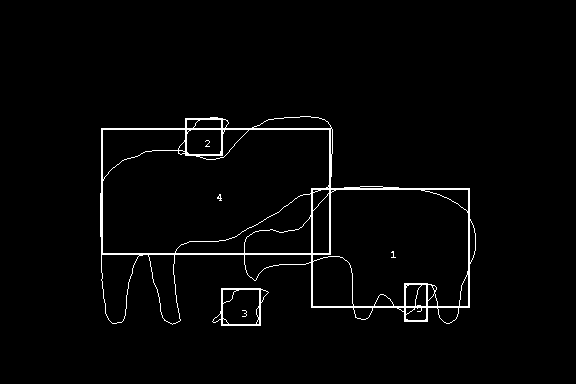

Object IDs:
{1: 'elephant', 2: 'dog', 3: 'dog', 4: 'horse', 5: 'dog'}


Object Counts:
{'dog': 3, 'elephant': 1, 'horse': 1}


Object Relations:
Analyzing object_id 1:elephant     and   object_id 2:dog
Analyzing object_id 1:elephant     and   object_id 3:dog
Analyzing object_id 1:elephant     and   object_id 4:horse
Analyzing object_id 1:elephant     and   object_id 5:dog
Analyzing object_id 2:dog          and   object_id 3:dog
Analyzing object_id 2:dog          and   object_id 4:horse
Analyzing object_id 2:dog          and   object_id 5:dog
Analyzing object_id 3:dog          and   object_id 4:horse
Analyzing object_id 3:dog          and   object_id 5:dog
Analyzing object_id 4:horse        and   object_id 5:dog


next to   : {(1, 5), (1, 3), (3, 4), (1, 4)}
above     : {(1, 5), (2, 4), (4, 3)}
below     : {(4, 2), (5, 1)}
touching  : {(1, 5), (2, 4)}
on        : {(2, 4)}
in        : set()


Object Locations:
Default Values: vertical center area is 33% of image height, horizontal center

In [6]:
imap.image_summary()

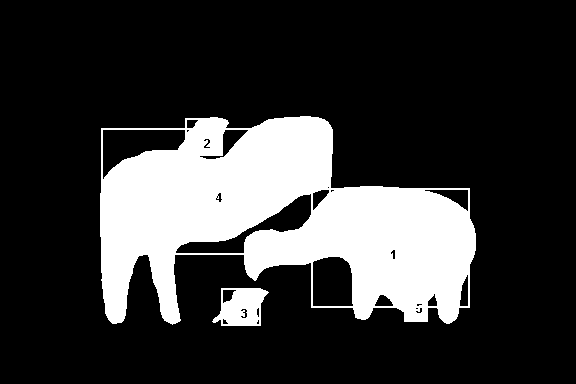

In [7]:
imap.show_mask(1,2,3,4,5, show_massbox=True, show_id=True)

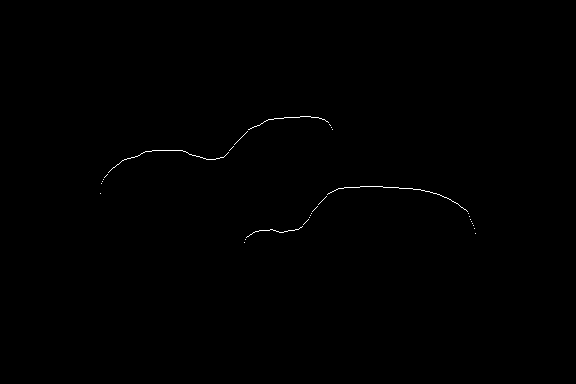

In [8]:
imap.show_mask(imap.object_topline(1,4))

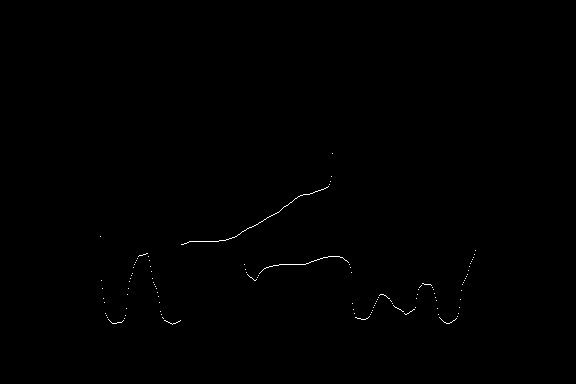

In [9]:
imap.show_mask(imap.object_bottomline(1,4))

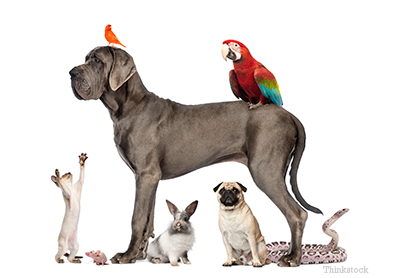

In [10]:
#load image
img = load_img('../images/mix_dog-cat-bird.jpg')
img

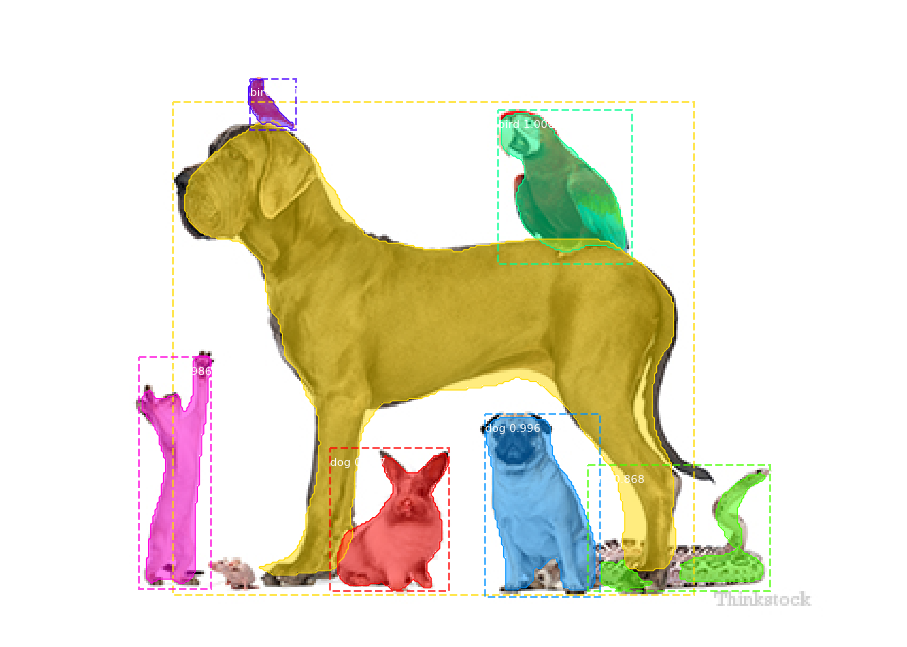

In [11]:
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping('images/mix_dog-cat-bird.jpg', r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

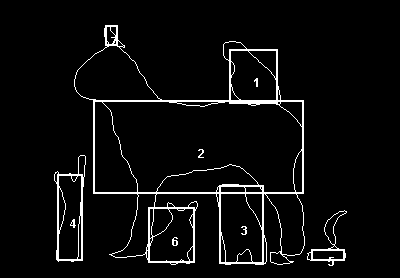

Object IDs:
{1: 'bird', 2: 'dog', 3: 'dog', 4: 'person', 5: 'bird', 6: 'dog', 7: 'bird'}


Object Counts:
{'bird': 3, 'dog': 3, 'person': 1}


Object Relations:
Analyzing object_id 1:bird         and   object_id 2:dog
Analyzing object_id 1:bird         and   object_id 3:dog
Analyzing object_id 1:bird         and   object_id 4:person
Analyzing object_id 1:bird         and   object_id 5:bird
Analyzing object_id 1:bird         and   object_id 6:dog
Analyzing object_id 1:bird         and   object_id 7:bird
Analyzing object_id 2:dog          and   object_id 3:dog
Analyzing object_id 2:dog          and   object_id 4:person
Analyzing object_id 2:dog          and   object_id 5:bird
Analyzing object_id 2:dog          and   object_id 6:dog
Analyzing object_id 2:dog          and   object_id 7:bird
Analyzing object_id 3:dog          and   object_id 4:person
Analyzing object_id 3:dog          and   object_id 5:bird
Analyzing object_id 3:dog          and   object_id 6:dog
Analyzing object_id 3:dog  

In [12]:
imap.image_summary()

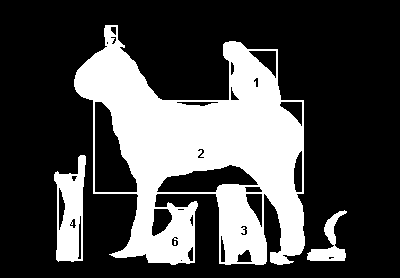

In [13]:
imap.show_mask(1,2,3,4,5,6,7, show_massbox=True, show_id=True)

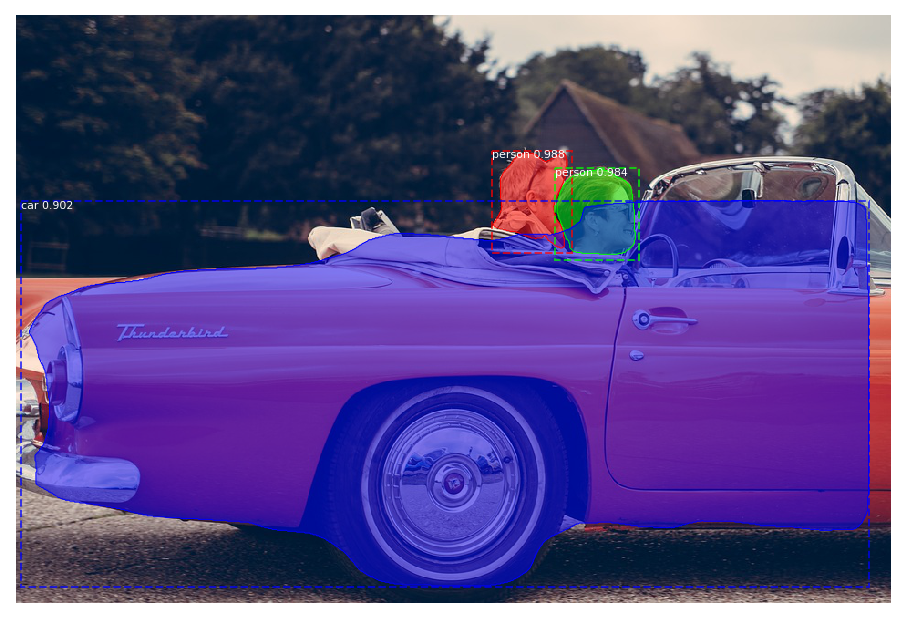

In [14]:
imagefile = '../images/people_in_car_noborder_org.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

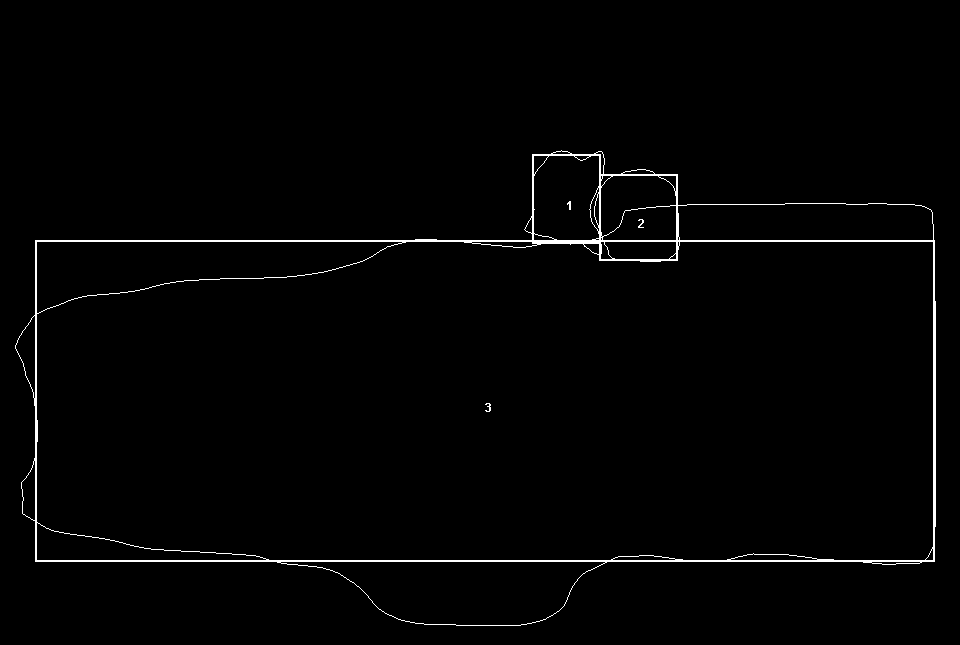

Object IDs:
{1: 'person', 2: 'person', 3: 'car'}


Object Counts:
{'car': 1, 'person': 2}


Object Relations:
Analyzing object_id 1:person       and   object_id 2:person
Analyzing object_id 1:person       and   object_id 3:car
Analyzing object_id 2:person       and   object_id 3:car


next to   : {(1, 2)}
above     : {(1, 3), (2, 3)}
below     : {(3, 2), (3, 1)}
touching  : {(1, 3), (2, 3)}
on        : {(1, 3), (2, 3)}
in        : set()


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: person       Location: {'vertical': {'center', 'top'}, 'horizontal': {'center', 'right'}}
ID: 2      Classification: person       Location: {'vertical': {'center', 'top'}, 'horizontal': {'right'}}
ID: 3      Classification: car          Location: {'vertical': {'center', 'bottom'}, 'horizontal': {'center', 'left', 'right'}}


In [15]:
imap.image_summary()

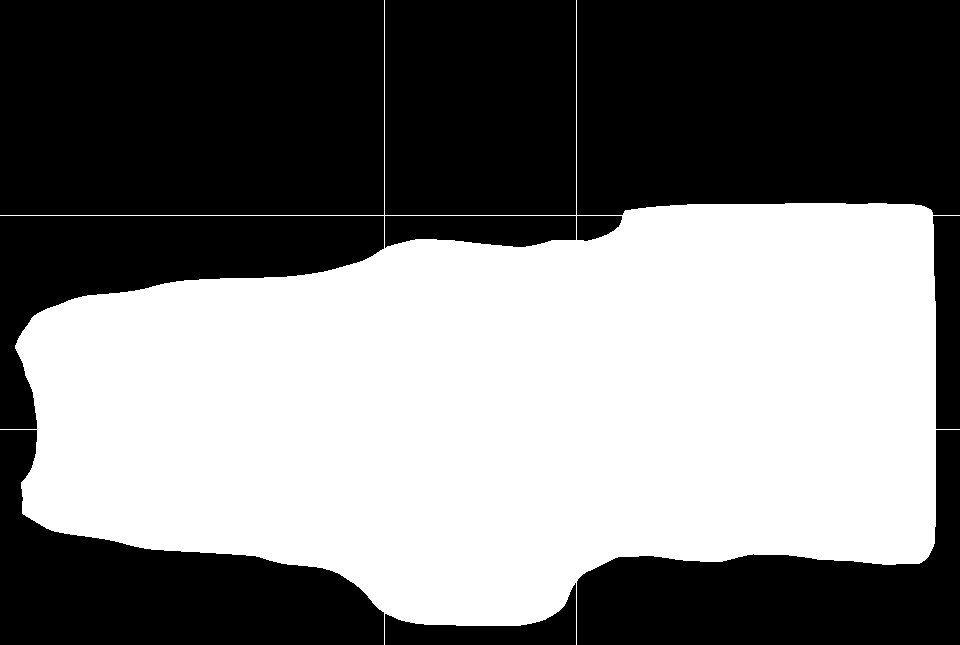

{'vertical': {'bottom', 'center'}, 'horizontal': {'center', 'left', 'right'}}

In [16]:
imap.object_location(3, grid=True)

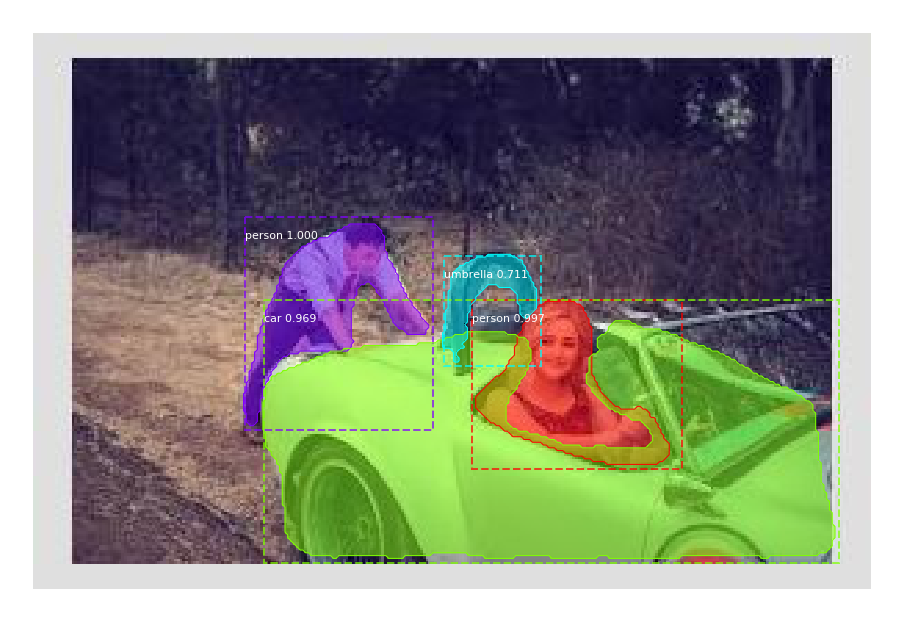

In [17]:
imagefile = '../images/mod_people_in_car2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

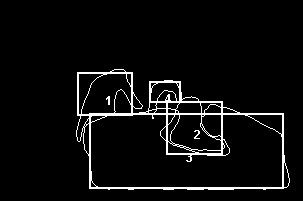

Object IDs:
{1: 'person', 2: 'person', 3: 'car', 4: 'umbrella'}


Object Counts:
{'car': 1, 'person': 2, 'umbrella': 1}


Object Relations:
Analyzing object_id 1:person       and   object_id 2:person
Analyzing object_id 1:person       and   object_id 3:car
Analyzing object_id 1:person       and   object_id 4:umbrella
Analyzing object_id 2:person       and   object_id 3:car
Analyzing object_id 2:person       and   object_id 4:umbrella
Analyzing object_id 3:car          and   object_id 4:umbrella


next to   : {(1, 2), (2, 4), (1, 4)}
above     : {(4, 2), (1, 3), (2, 3), (4, 3)}
below     : {(3, 2), (3, 1), (3, 4)}
touching  : {(3, 4), (1, 3), (2, 3)}
on        : {(1, 3), (2, 3), (4, 3)}
in        : set()


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: person       Location: {'vertical': {'center'}, 'horizont

In [18]:
imap.image_summary()

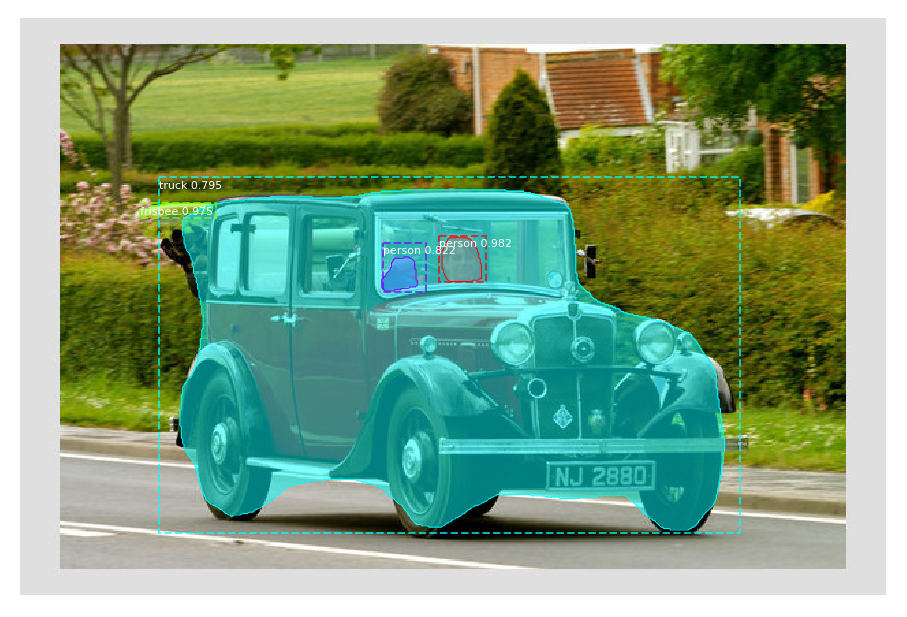

In [19]:
imagefile = '../images/mod_people_in_car4.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

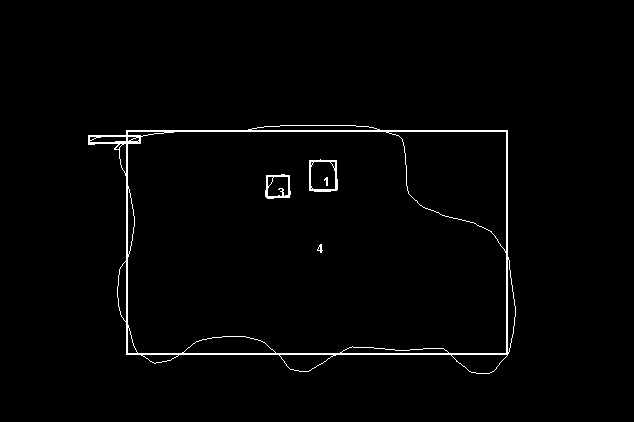

Object IDs:
{1: 'person', 2: 'frisbee', 3: 'person', 4: 'truck'}


Object Counts:
{'frisbee': 1, 'person': 2, 'truck': 1}


Object Relations:
Analyzing object_id 1:person       and   object_id 2:frisbee
Analyzing object_id 1:person       and   object_id 3:person
Analyzing object_id 1:person       and   object_id 4:truck
Analyzing object_id 2:frisbee      and   object_id 3:person
Analyzing object_id 2:frisbee      and   object_id 4:truck
Analyzing object_id 3:person       and   object_id 4:truck


next to   : {(1, 3)}
above     : {(3, 4), (2, 4), (1, 4)}
below     : {(4, 2), (4, 1), (4, 3)}
touching  : {(3, 4), (2, 4), (1, 4)}
on        : {(2, 4)}
in        : {(3, 4), (1, 4)}


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: person       Location: {'vertical': {'center'}, 'horizontal': {'center'}}
ID: 2      C

In [20]:
imap.image_summary()

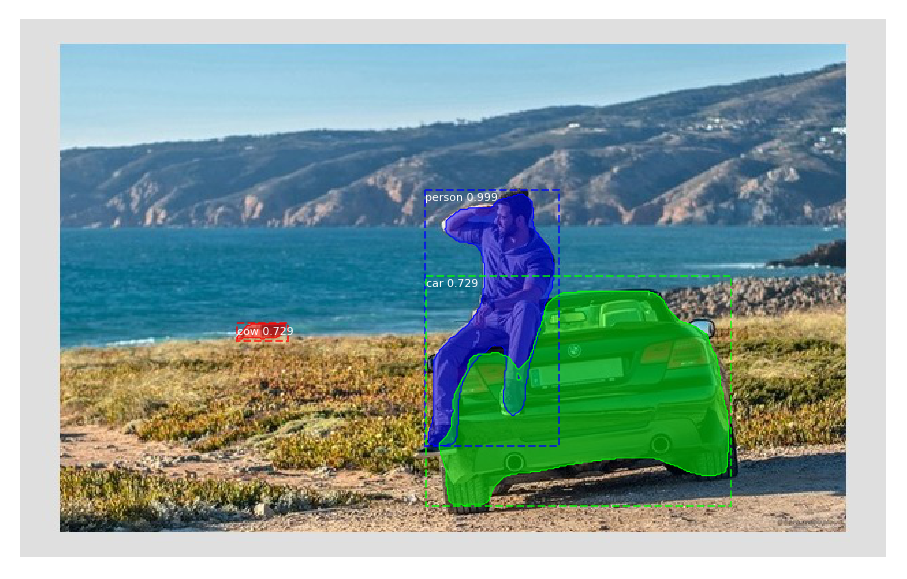

In [21]:
imagefile = '../images/mod_people_on_car1.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

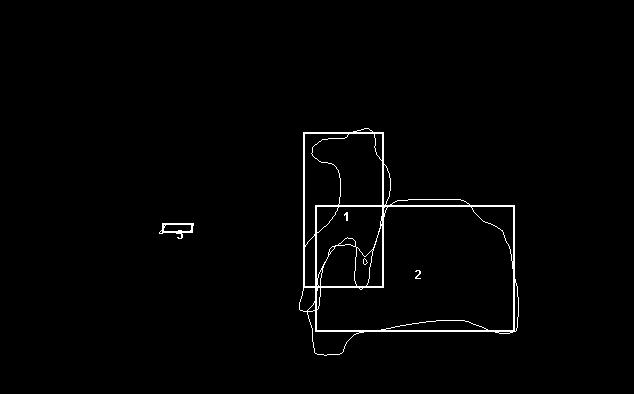

Object IDs:
{1: 'person', 2: 'car', 3: 'cow'}


Object Counts:
{'car': 1, 'cow': 1, 'person': 1}


Object Relations:
Analyzing object_id 1:person       and   object_id 2:car
Analyzing object_id 1:person       and   object_id 3:cow
Analyzing object_id 2:car          and   object_id 3:cow


next to   : set()
above     : {(1, 2)}
below     : {(2, 1)}
touching  : {(1, 2)}
on        : {(1, 2)}
in        : set()


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: person       Location: {'vertical': {'center'}, 'horizontal': {'center'}}
ID: 2      Classification: car          Location: {'vertical': {'center', 'bottom'}, 'horizontal': {'center', 'right'}}
ID: 3      Classification: cow          Location: {'vertical': {'center'}, 'horizontal': {'left'}}


In [22]:
imap.image_summary()

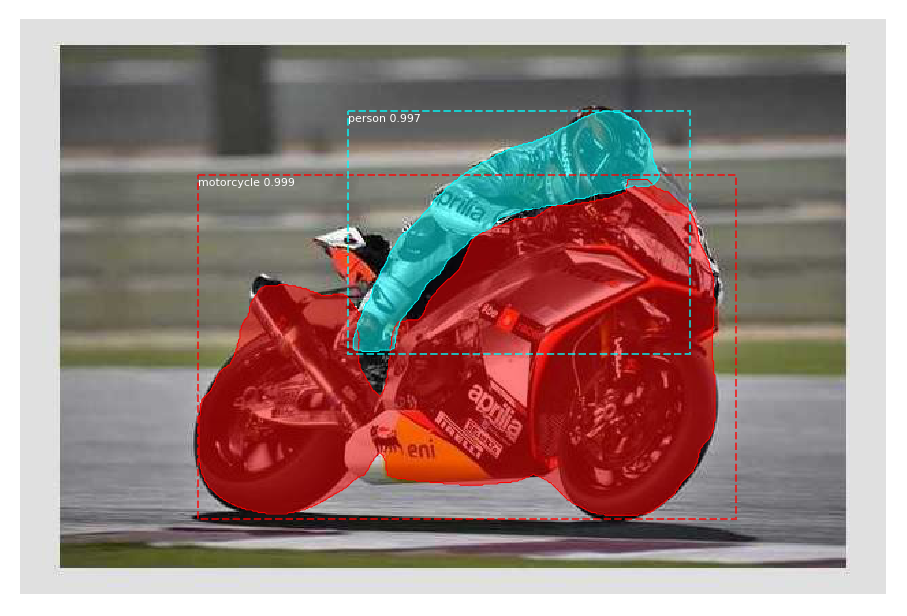

In [23]:
imagefile = '../images/mod_people_on_motorcycle.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

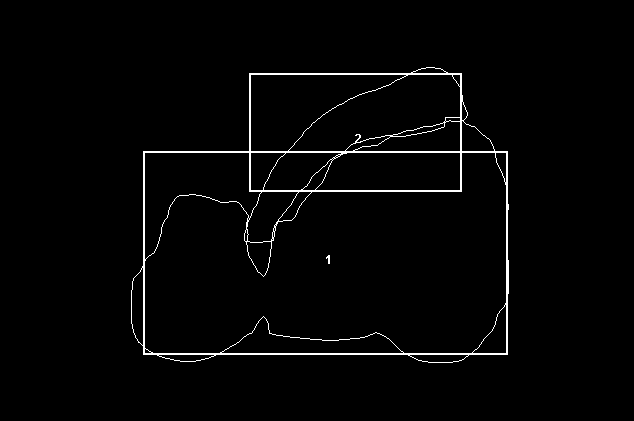

Object IDs:
{1: 'motorcycle', 2: 'person'}


Object Counts:
{'motorcycle': 1, 'person': 1}


Object Relations:
Analyzing object_id 1:motorcycle   and   object_id 2:person


next to   : set()
above     : {(2, 1)}
below     : {(1, 2)}
touching  : {(1, 2)}
on        : {(2, 1)}
in        : set()


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: motorcycle   Location: {'vertical': {'center', 'bottom'}, 'horizontal': {'center', 'left', 'right'}}
ID: 2      Classification: person       Location: {'vertical': {'center', 'top'}, 'horizontal': {'center', 'right'}}


In [24]:
imap.image_summary()

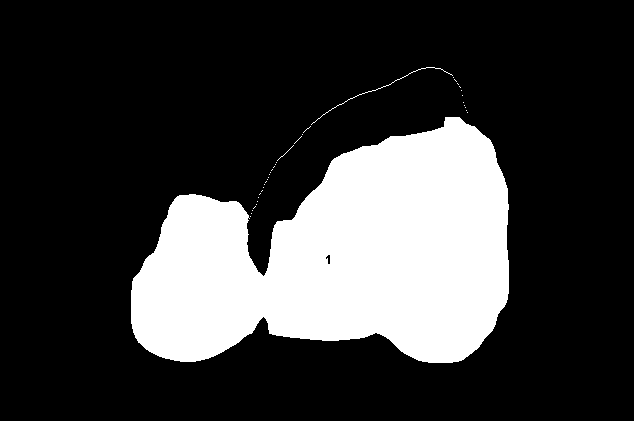

In [25]:
p=imap.show_mask(imap.object_topline(2))
m=imap.show_mask(1, show_massbox=False, show_id=True)
Image.composite(p,m,p)

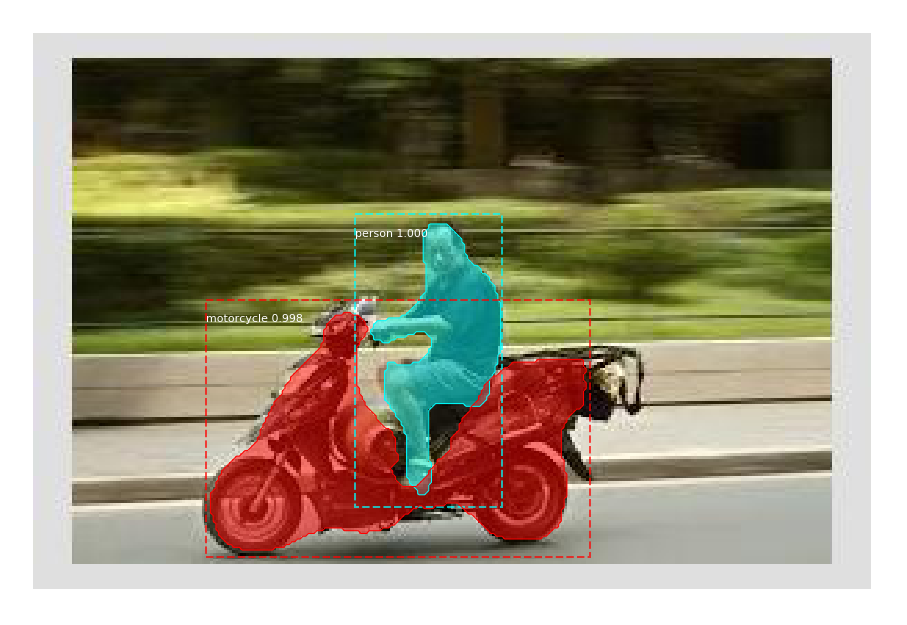

In [26]:
imagefile = '../images/mod_people_on_motorcycle2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

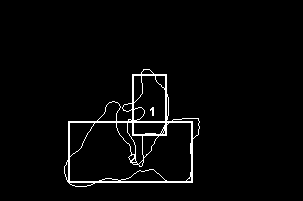

Object IDs:
{1: 'person', 2: 'motorcycle'}


Object Counts:
{'motorcycle': 1, 'person': 1}


Object Relations:
Analyzing object_id 1:person       and   object_id 2:motorcycle


next to   : set()
above     : {(1, 2)}
below     : {(2, 1)}
touching  : {(1, 2)}
on        : {(1, 2)}
in        : set()


Object Locations:
Using default values: vertical center is 20% of image height, horizontal center is 33% of image width.
Use instance_variable.object_location(object_ID, grid=True) to show grid lines.
ID: 1      Classification: person       Location: {'vertical': {'center'}, 'horizontal': {'center'}}
ID: 2      Classification: motorcycle   Location: {'vertical': {'bottom'}, 'horizontal': {'center', 'left'}}


In [27]:
imap.image_summary()